In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import os
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv(r"D:\Documentos\Especialidad\DataMining\Tarea2\Dataset\bank.csv", sep=";")

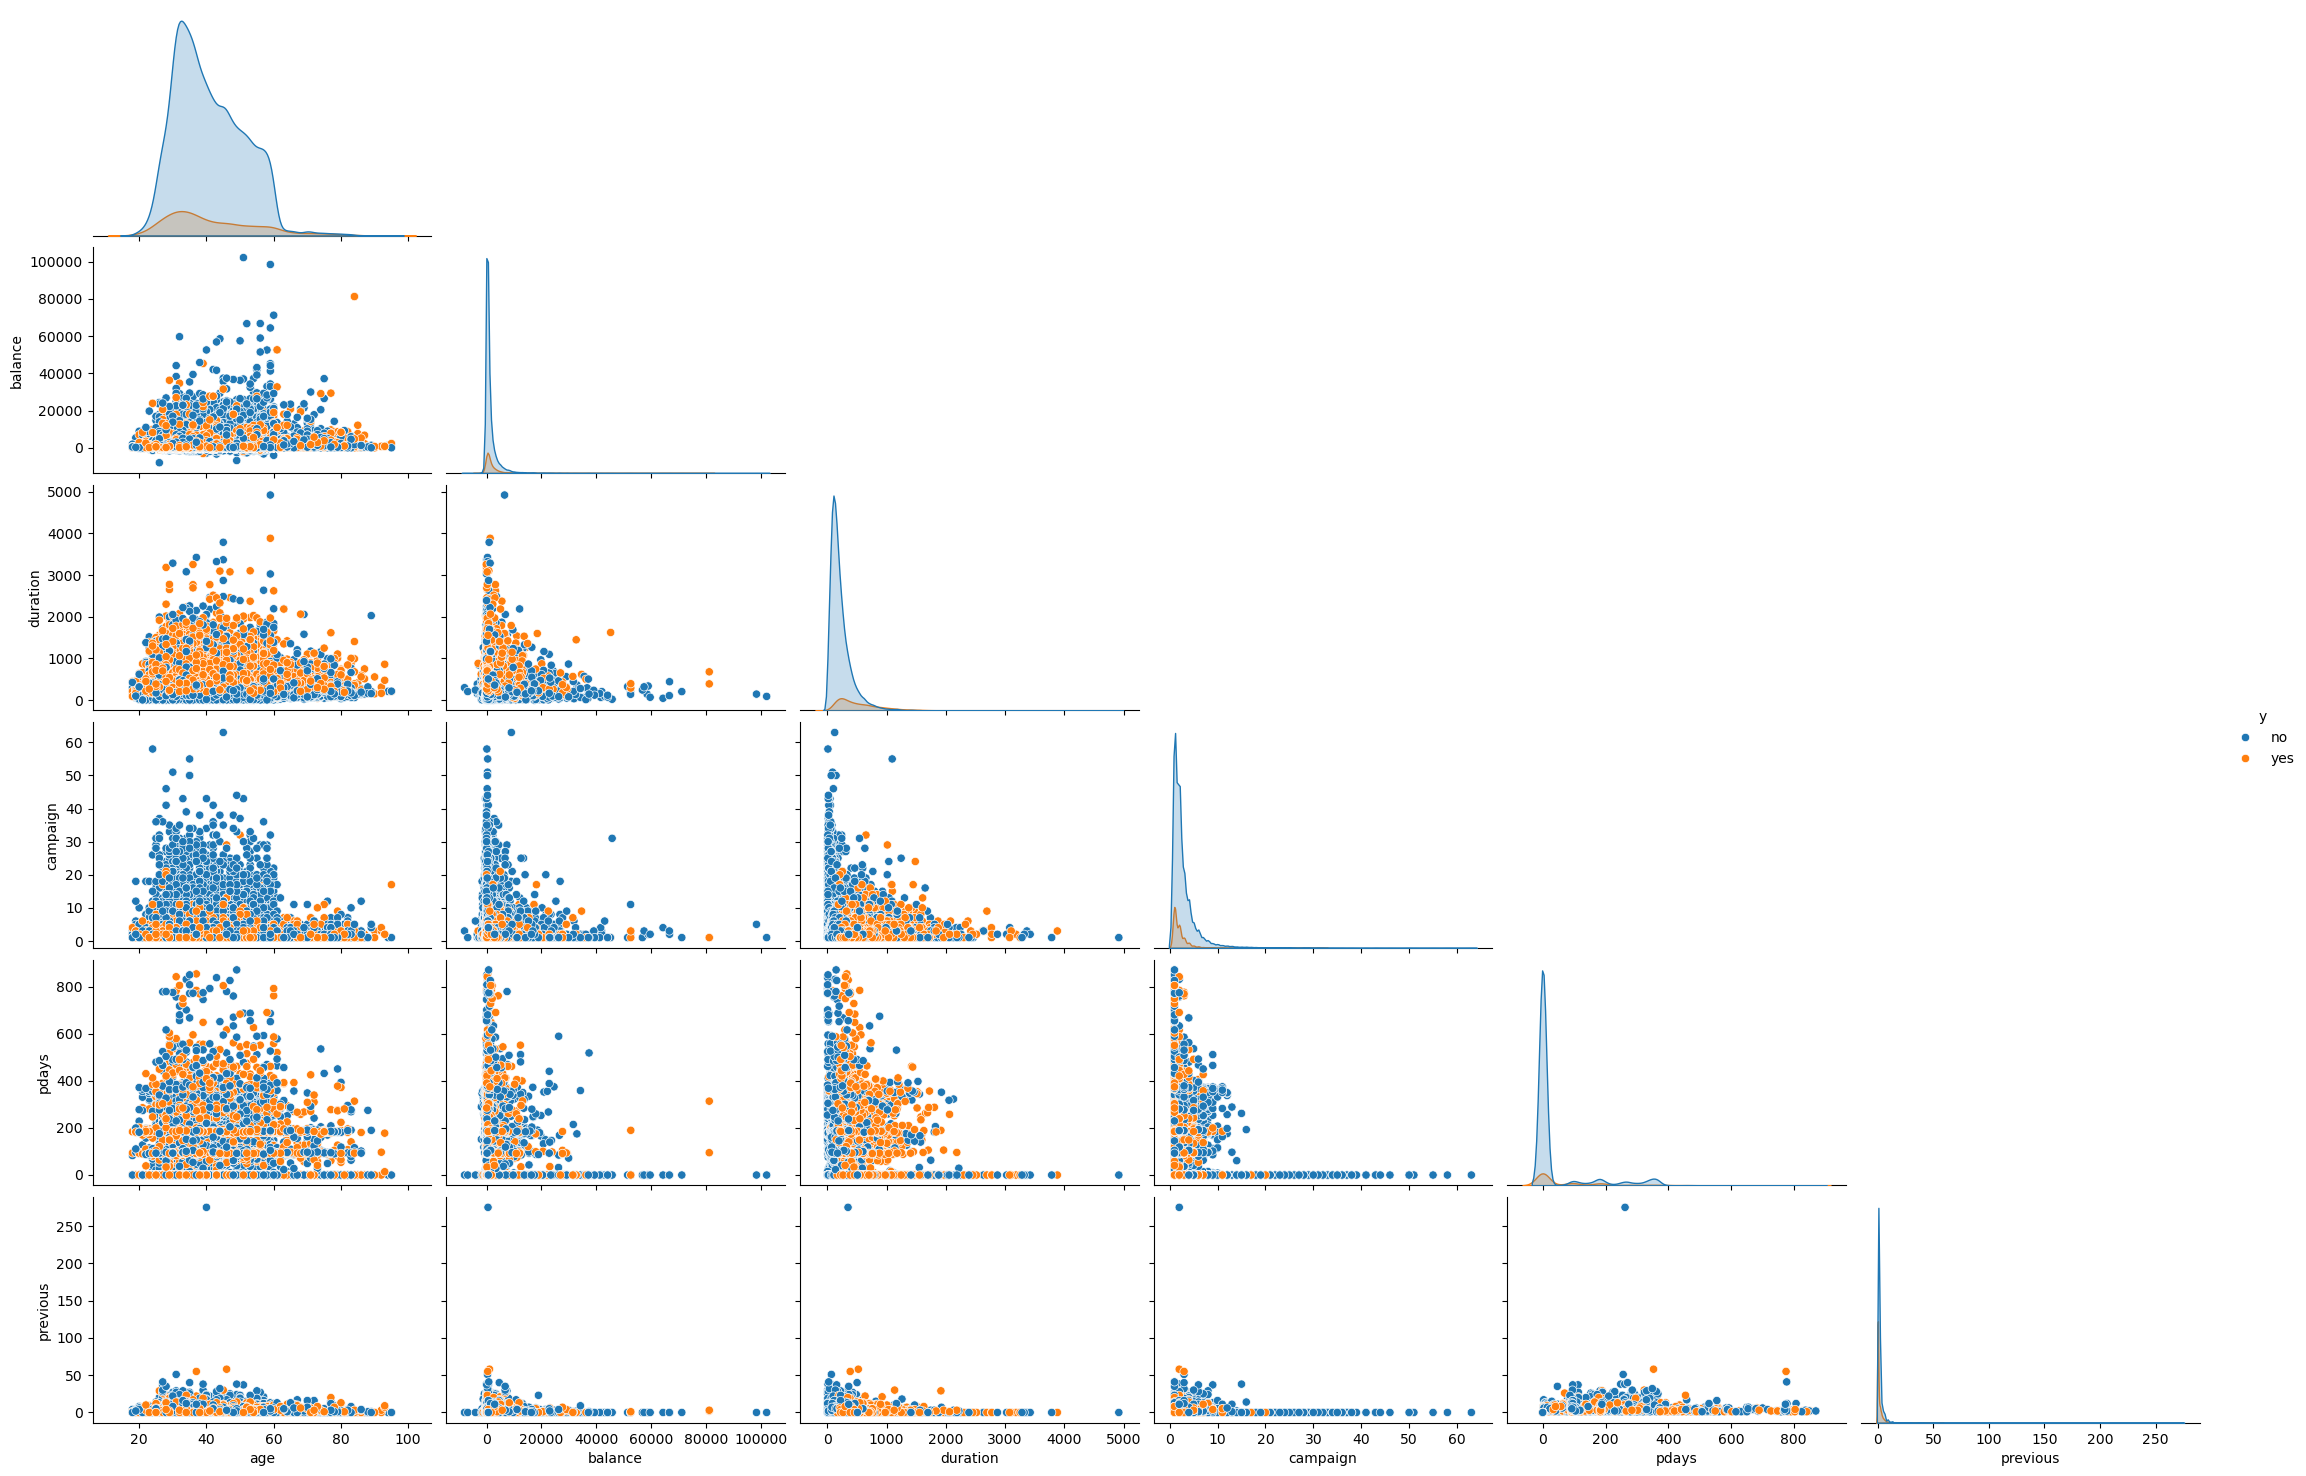

In [2]:

num_vars = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

sns.pairplot(
    data[num_vars + ['y']],
    hue='y',
    diag_kind='kde',
    corner=True,
    aspect=1.5
)

plt.show()

# K-Means

In [3]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Copia de seguridad
df = data.copy()

# Guardamos y para análisis posterior
y = df['y']
df = df.drop(columns=['y'])

# One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

print("Dimensiones finales:", X_scaled.shape)


Dimensiones finales: (45211, 42)


In [4]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Métrica
sil_kmeans = silhouette_score(X_scaled, clusters_kmeans)
print("Silhouette K-Means:", sil_kmeans)


Silhouette K-Means: 0.05246728709710793


# DBSCAN

In [5]:
dbscan = DBSCAN(eps=1.5, min_samples=10)
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Número de clusters reales (sin contar ruido)
n_clusters_dbscan = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)

print("Clusters DBSCAN:", n_clusters_dbscan)


# Silhouette solo si hay más de 1 cluster
if n_clusters_dbscan > 1:
    sil_dbscan = silhouette_score(X_scaled, clusters_dbscan)
    print("Silhouette DBSCAN:", sil_dbscan)
else:
    sil_dbscan = None
    print("DBSCAN no generó clusters útiles")




Clusters DBSCAN: 450
Silhouette DBSCAN: -0.12022713610292328


Visualización (PCA)

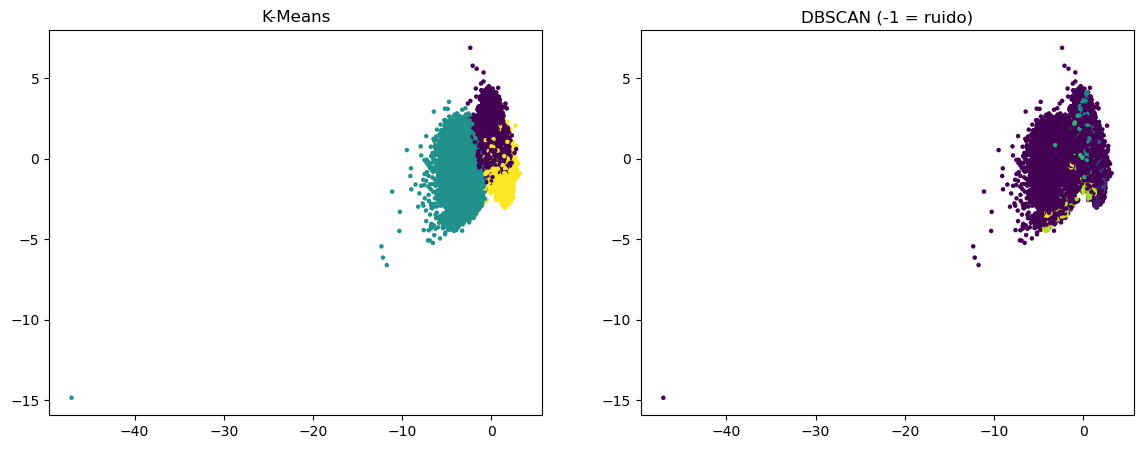

In [6]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# KMeans
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, s=5)
ax[0].set_title("K-Means")

# DBSCAN
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_dbscan, s=5)
ax[1].set_title("DBSCAN (-1 = ruido)")

plt.show()


Visualización (PCA para ver el alma de los datos)

Análisis de la variable de interés (y)

In [7]:
df_analysis = data.copy()

df_analysis['cluster_kmeans'] = clusters_kmeans
df_analysis['cluster_dbscan'] = clusters_dbscan

# Proporción de clientes que dijeron "yes" por cluster
print("K-Means vs y")
print(pd.crosstab(df_analysis['cluster_kmeans'], df_analysis['y'], normalize='index'))

print("\nDBSCAN vs y")
print(pd.crosstab(df_analysis['cluster_dbscan'], df_analysis['y'], normalize='index'))


K-Means vs y
y                     no       yes
cluster_kmeans                    
0               0.880361  0.119639
1               0.769033  0.230967
2               0.944538  0.055462

DBSCAN vs y
y                     no       yes
cluster_dbscan                    
-1              0.817323  0.182677
 0              0.987055  0.012945
 1              0.959184  0.040816
 2              0.986486  0.013514
 3              1.000000  0.000000
...                  ...       ...
 445            0.666667  0.333333
 446            0.736842  0.263158
 447            0.700000  0.300000
 448            0.636364  0.363636
 449            0.727273  0.272727

[451 rows x 2 columns]
